<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/34_Visualizing_Transparency_Dimensional_Reduction_of_Glass_Composition_Data_Using_t_Distributed_Stochastic_Neighbor_Embedding_Techniques_(T_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Visualizing Transparency: Dimensional Reduction of Glass Composition Data Using t-Distributed Stochastic Neighbor Embedding Techniques (T-SNE)"</b></div>




# *Project overview*

- The aim of this project is to use t-Distributed Stochastic Neighbor Embedding (t-SNE) exclusively for dimensionality reduction on the Glass Identification Data Set from UCI. This dataset consists of 214 instances and 9 attributes related to glass composition. By applying t-SNE, the project seeks to simplify the dataset while preserving its local structure, facilitating further analysis of glass classification.

### Source Information:

- **Dataset**: Glass Identification Data Set
- **Origin**: UCI Machine Learning Repository
- **Creator**: B. German, Central Research Establishment, Home Office Forensic Science Service, Aldermaston, Reading, Berkshire RG7 4PN
- **Donor**: Vina Spiehler, Ph.D., DABFT, Diagnostic Products Corporation
- **Acknowledgements**: For more information, visit [UCI Glass Identification Dataset](https://archive.ics.uci.edu/ml/datasets/glass+identification).


# *1.Import Library*

In [ ]:
from time import time
import numpy as np
import pandas as pd
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# *2.Import Dataset*

In [ ]:
df=pd.read_csv('Desktop/glass.csv')
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

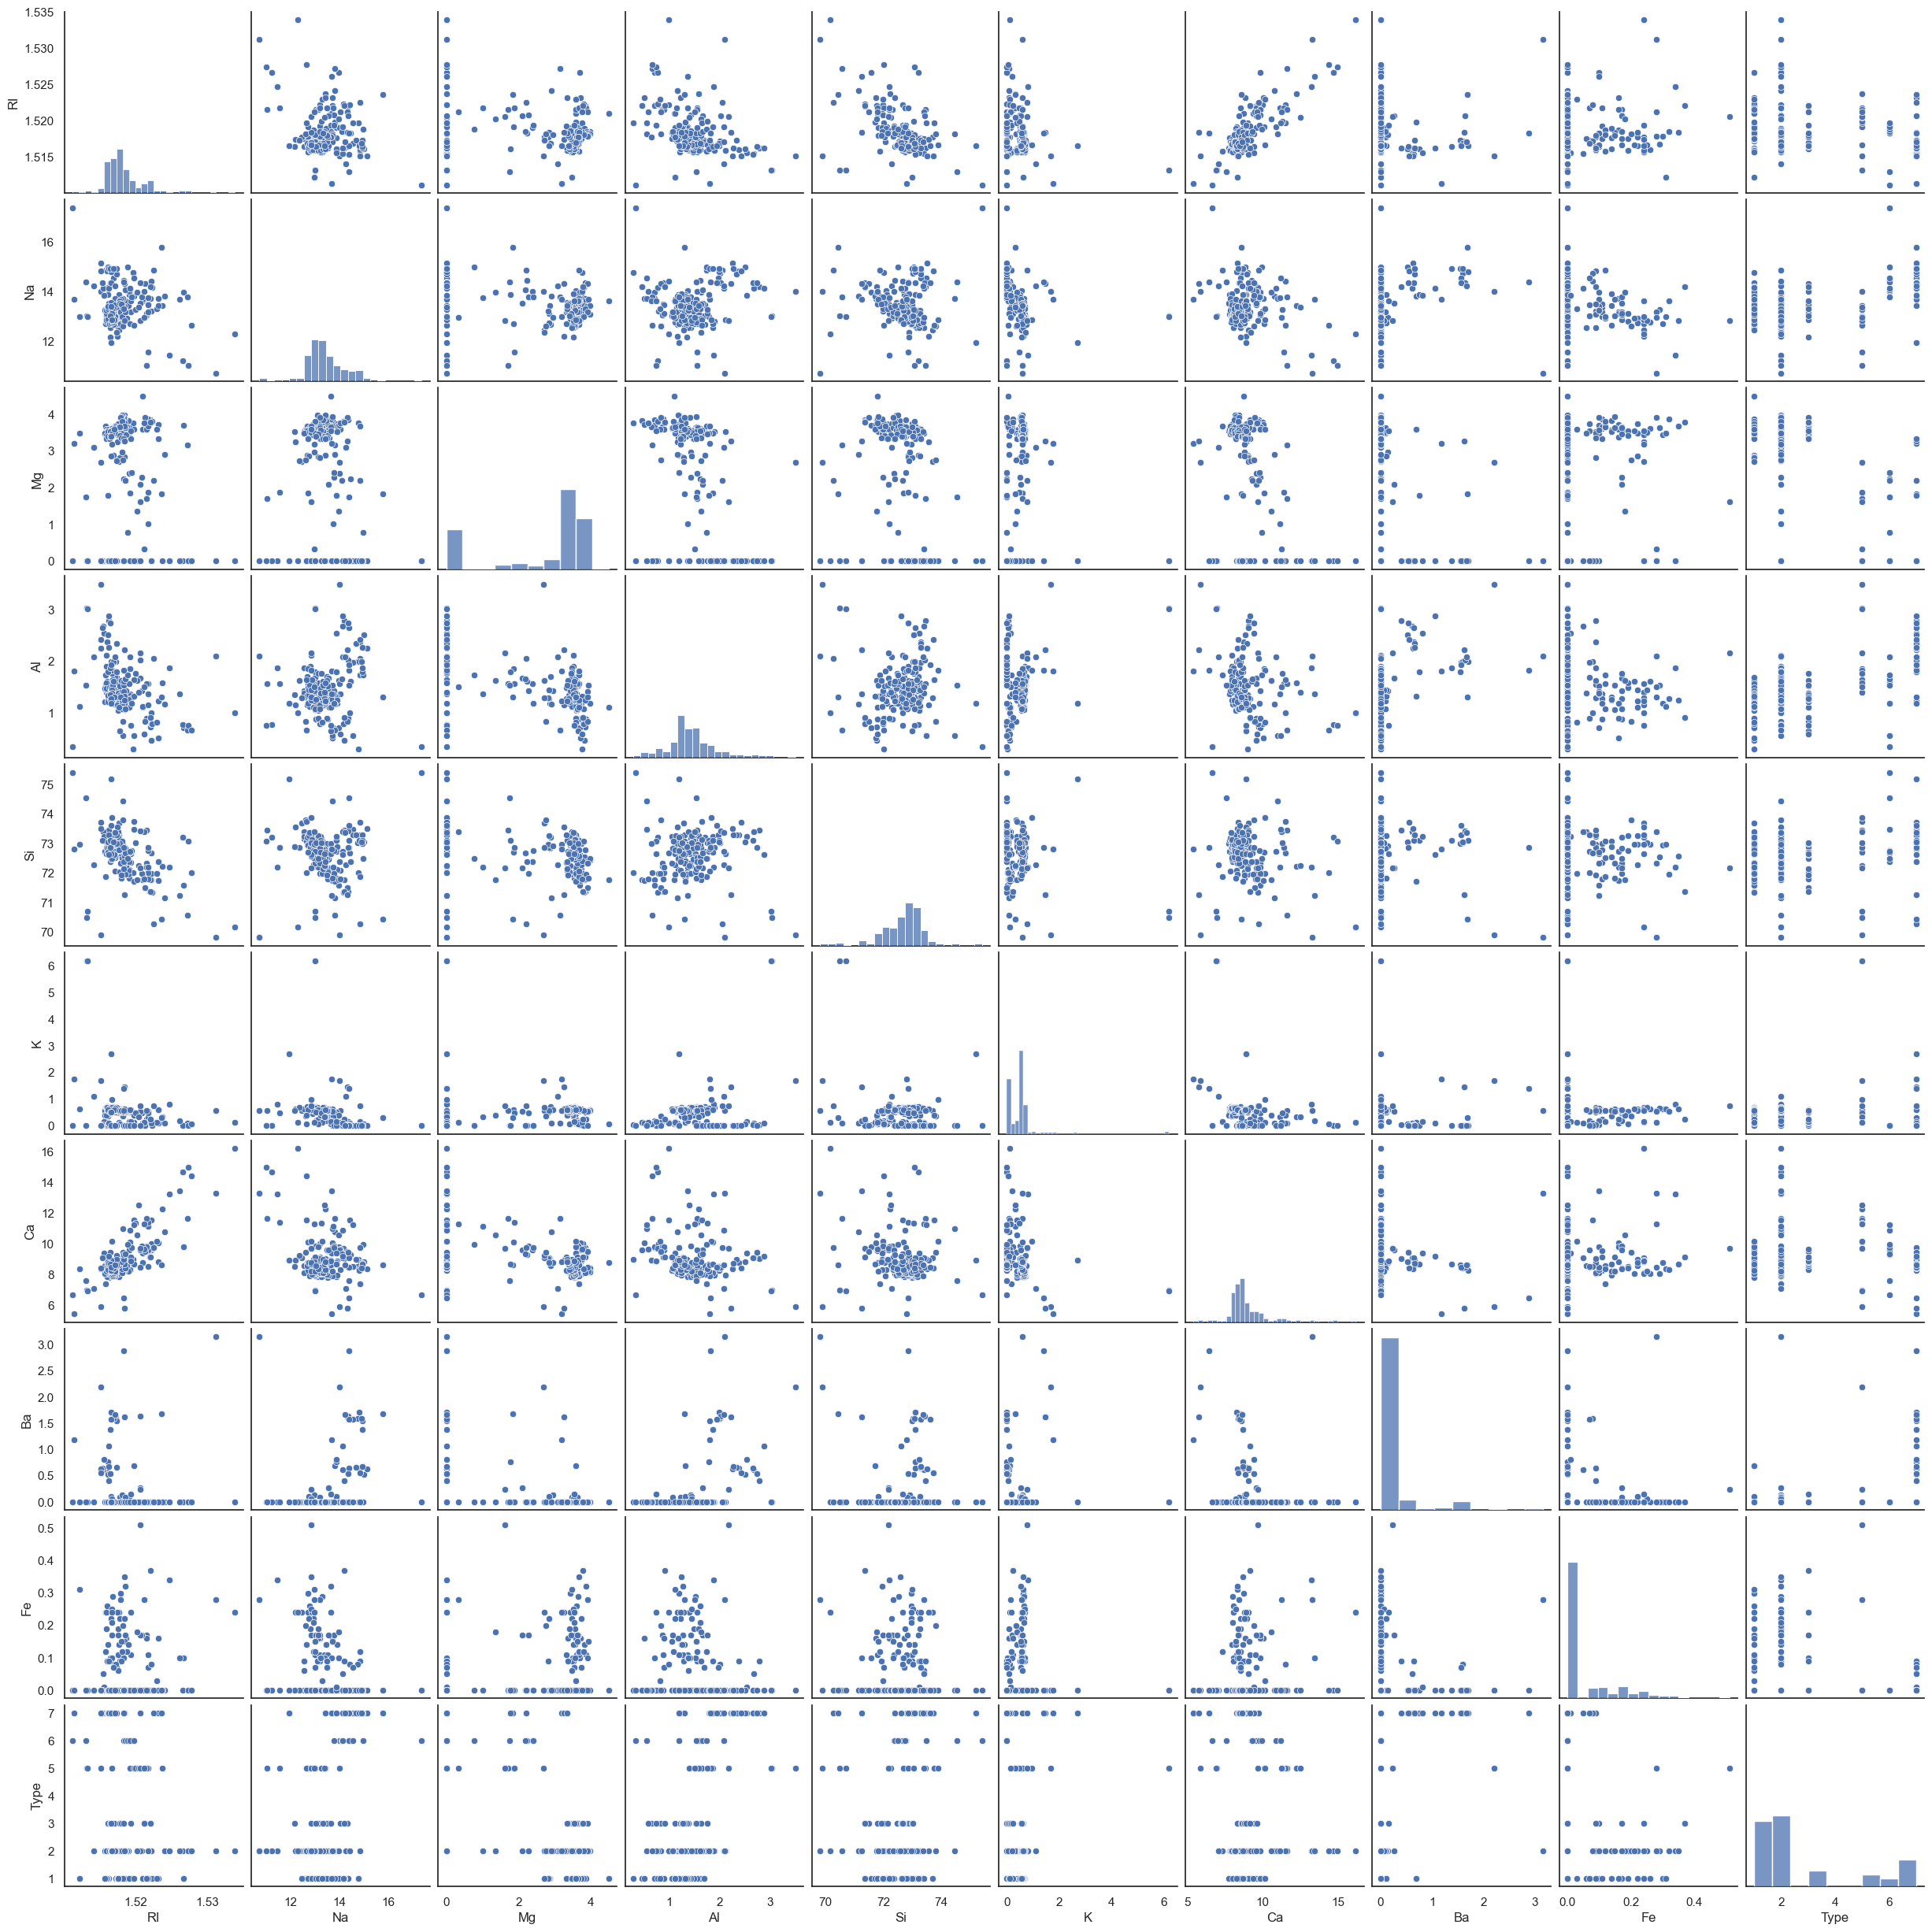

In [ ]:
sns.pairplot(df)

In [ ]:
# Since it is very complicated we need to reduce dimesion and make it more readible

In [ ]:
# remove unnecesarry column
from sklearn.preprocessing import StandardScaler

df1=df.iloc[:, :9] # remove type , because we dont try to classify , we are trying to reduce dimensionality
columns=df1.columns
df2 = StandardScaler().fit_transform(df1)
df3 = pd.DataFrame(df2, columns=columns)
df3.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(df1)

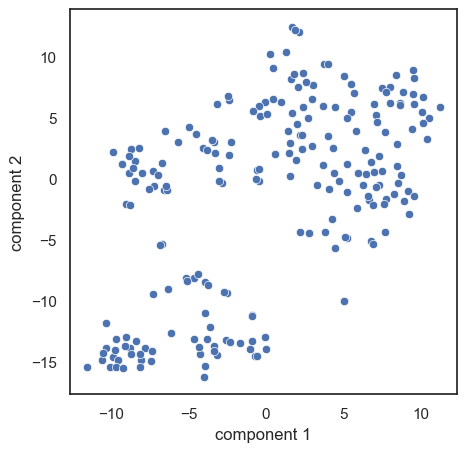

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
df_tsne = pd.DataFrame(data_tsne,
                       columns=['component 1','component 2'])

sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne);

In [ ]:
# this is very hard to interpret that is why we need to use color to show cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# Fit the model to the data
kmeans.fit(df3)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

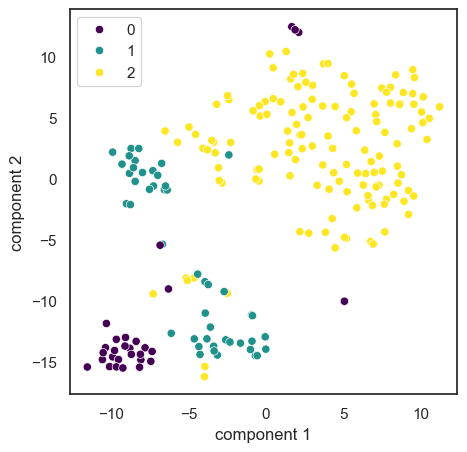

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne, hue=labels, palette='viridis');

Text(0, 0.5, 'Component 2')

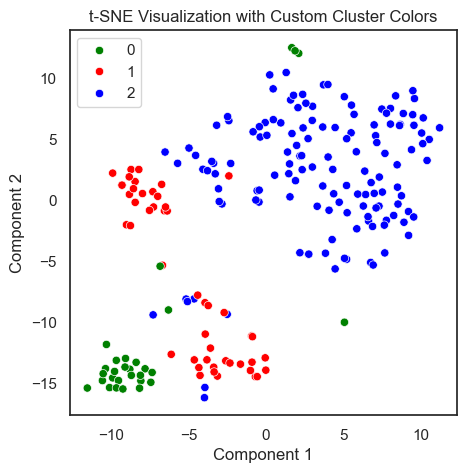

In [ ]:
custom_palette = {0: 'green', 1: 'red', 2: 'blue'}

# Create the scatter plot
f, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='component 1',  # Corrected column names
                y='component 2',
                data=df_tsne,
                hue=labels,  # Replace 'labels' with your actual cluster labels
                palette=custom_palette,
                legend='full',  # Ensure the full legend is displayed
                ax=ax)

# Adding titles and labels
ax.set_title('t-SNE Visualization with Custom Cluster Colors')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

#it looks more understanable

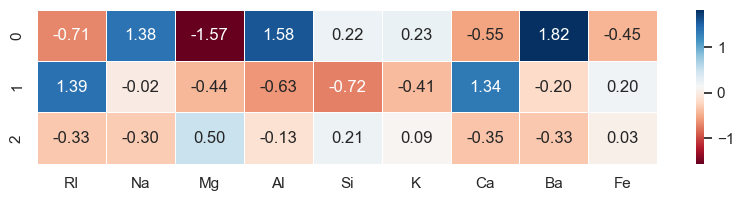

In [ ]:
centroids_df = pd.DataFrame(centroids, columns=df3.columns)
plt.figure(figsize=(10, 2))
sns.heatmap(centroids_df, annot=True, cmap="RdBu", fmt=".2f", linewidths=.5)
plt.show()

**Cluster interpretations:**
* Cluster 0 High AL,BA,NA,
* Cluster 1 HIGH RI,CA // LOW SI,K
* Cluster 2 HIGH MG // LOW RI,NA,CA,BA

# *3D Visualiztion*

In [ ]:
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(df1)
df_tsne = pd.DataFrame(data_tsne,
                       columns=['component1','component2','component3'])
df_tsne.head()

,component1,component2,component3
0,-0.276168,-4.464495,0.651522
1,4.929680,-2.570232,-2.147465
2,5.306885,-1.302959,-2.182930
3,2.700983,-1.886332,-1.307115
4,3.850306,-0.176296,-2.710035


In [ ]:

import plotly.graph_objects as go


df_tsne['cluster'] = kmeans.labels_

x = df_tsne['component1']
y = df_tsne['component2']
z = df_tsne['component3']
cluster_labels = df_tsne['cluster']

unique_clusters = cluster_labels.unique()
colors = np.linspace(0, 1, len(unique_clusters))

fig = go.Figure()

for cluster, color in zip(unique_clusters, colors):
    cluster_data = df_tsne[df_tsne['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['component1'],
        y=cluster_data['component2'],
        z=cluster_data['component3'],
        mode='markers',
        marker=dict(
            size=5,
            color=color,
            colorscale='Viridis',
            opacity=0.7,
            showscale=False
        ),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='3D Scatter Plot with Clusters',
    margin=dict(l=0, r=0, b=0, t=40),
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    ),
    legend=dict(
        title='Clusters',
        orientation='v',
        xanchor='left',
        x=1,
        y=1
    )
)

fig.show()


In [ ]:
# This might be seen different from 2 dimension, but it is good to interpred more clearly
